Welcome!

In [1]:
# %pip install -r requirements.txt
#pip installs a list of libraries
#list can be found in requirements.txt

#important import names
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns

In [2]:
#import statements til I figure out the other way 
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
nltk.download('punkt_tab')
nltk.download('tagsets')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import random
import pandas as pd
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
import json
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tabulate import tabulate
import requests
import re


[nltk_data] Downloading package punkt_tab to /home/jen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package tagsets to /home/jen/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/jen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_dat

In [3]:
#import sys
#sys.path.append('.')
#from importables import *
#grabs all imports from import.py

#This is not working but it should be >>>:(

In [ ]:
df_elife_train = pd.read_parquet('data/Elife/train-00000-of-00001.parquet')
df_elife_test = pd.read_parquet('data/Elife/test-00000-of-00001.parquet')
df_elife_validation = pd.read_parquet('data/Elife/validation-00000-of-00001.parquet')
df_elife_validation.head(5)

df_elife = df_elife_train

In [5]:
df_elife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article           142 non-null    object
 1   summary           142 non-null    object
 2   section_headings  142 non-null    object
 3   keywords          142 non-null    object
 4   year              142 non-null    object
 5   title             142 non-null    object
dtypes: object(6)
memory usage: 6.8+ KB


In [6]:
# df_plos_train_1 = pd.read_parquet('data/PLOS/train-00000-of-00003.parquet')
# df_plos_train_2 = pd.read_parquet('data/PLOS/train-00001-of-00003.parquet')
# df_plos_train_3 = pd.read_parquet('data/PLOS/train-00002-of-00003.parquet')
# df_plos_test = pd.read_parquet('data/PLOS/test-00000-of-00001.parquet')
# df_plos_validation = pd.read_parquet('data/PLOS/validation-00000-of-00001.parquet')
# df_plos_train_3.head(5)

In [7]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [8]:
def data_cleaner(doc):
    """A function to strip punctuation, strip stopwords, casefold, lemmatize,
    And part of speech tag words for clean data for modeling"""
    custom_stops = ['doi', 'figure', 'elife', 'et', 'al']
    sw = stopwords.words('english')
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw and word not in custom_stops]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [9]:
#listifies contents in articl column
articles_list = df_elife.article.tolist()
print(len(articles_list))

142


In [10]:
#print(articles_list[0])
def freqdist_maker(doc_list):
    """A function to tokenize all words in all articles"""
    doc_tokens = []
    for i in doc_list:
        doc_tokens.append(word_tokenize(i))
        
    #tokenizes raw article data into single list of tokens, not broken into sentences
    doc_tokens_flat = [word for doc in doc_tokens for word in doc]
    
    #collect raw tokens
    all_words_raw = []
    for w in doc_tokens_flat :
        all_words_raw.append(w)
    print('length of all words', len(all_words_raw))

    #gets count of tokens and types
    tokens = all_words_raw
    types = set(tokens)
    print('length of types', len(types))
    print('length of tokens', len(tokens))

    fdist1 = nltk.FreqDist(tokens)

    fdist1.plot(25, title = 'Doc Freqeuncy Distribution', cumulative = True);

In [11]:
#tokenize all words in all articles
article_tokens = []
for i in articles_list:
    article_tokens.append(word_tokenize(i))
print(len(article_tokens[0]))

8131


In [12]:
#tokenizes raw article data into single list of tokens, not broken into sentences
article_tokens_flat = [word for doc in article_tokens for word in doc]

print(article_tokens_flat[0])

Most


In [13]:
#collect raw tokens
all_words_raw = []

for w in article_tokens_flat :
    all_words_raw.append(w)
    
print(len(all_words_raw))

1181174


In [14]:
#gets count of tokens and types
tokens = all_words_raw
types = set(tokens)
len(types), len(tokens)

(54832, 1181174)

In [15]:
fdist1 = nltk.FreqDist(tokens)
fdist1
#create frequency distribution, checks all tokens and how often they occur in the vocab
#prints out top 10 most used, these are usally stopwrods as the data has not been cleaned

FreqDist({',': 67348, '.': 58482, 'the': 44216, '(': 30480, ')': 30480, 'of': 30181, 'and': 29641, 'in': 21169, 'to': 17361, 'a': 12720, ...})

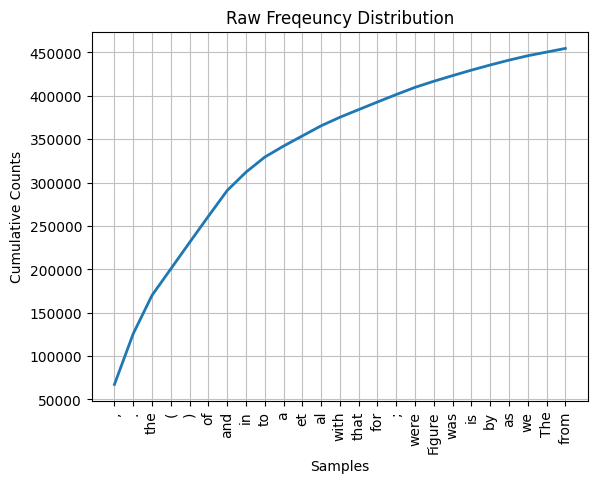

In [16]:
fdist1.plot(25, title = 'Raw Freqeuncy Distribution', cumulative = True);

In [17]:
fdist1.hapaxes()[:10]
#first ten unique words

['transmitter-mediated',
 'interleaving',
 'Hemichannels',
 'Söhl',
 'Willecke',
 'innexins',
 'reconfiguring',
 'Völgyi',
 'channel-forming',
 'Llinás']

In [18]:
elife_doc_lengths = []

for doc in articles_list:
    elife_doc_lengths.append(len(doc))

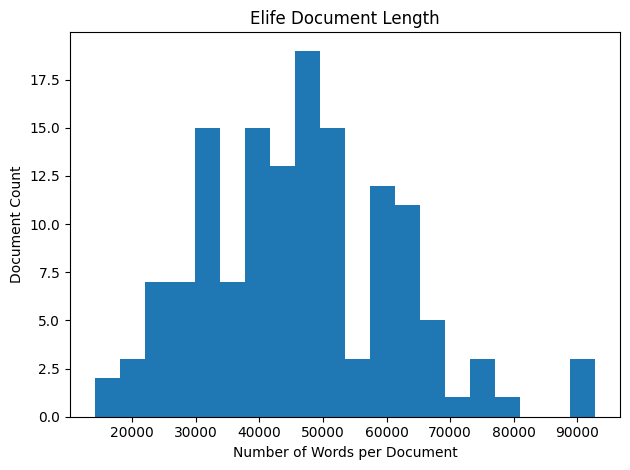

In [19]:
n_bins = 20
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(elife_doc_lengths, bins=n_bins)
axs.set_title("Elife Document Length");
axs.set_xlabel('Number of Words per Document');
axs.set_ylabel("Document Count");

# Data Preparation and Cleaning

The first step to our data praparation was to remove large outliers. If you look at the Elife Document Length bar graph above that at about 110000 words in length we have a handful of very lengthy documents. This will allow us to cut back on the amount of processing and time. We will also benefit from not having content from extra large documents over weighting our tf-idf scores. We removed 53 large outlier articles.

In [20]:
#code to remove documents of more than 11000 words
#df_elife_train = df_elife_train[df_elife_train['article'].str.len() < 110000 ]
print(df_elife.shape)
articles_no_outliers = df_elife.article.tolist()
print(len(articles_no_outliers))

(142, 6)
142


One of the other problems we encountered when inspecting the data is the large amount of academic in text citations. These citations cause several issues, they're so common that they occur far more frequently than content words do, which creates extra noise. They're also full of punctuation which messes with the mechanics of the sentence tokenizer we selected. This resulted in a lot of "false" sentences. To solve these issues we removed the citations and moved the function to do so up above the more standard cleaning function. This allows us to keep our sentence index stable throughout the process while also cutting the amount of sentences per doc by almost half.

In [21]:
#initally removes things between parenthesis to keep sentence number stable in later process
def remove_between_parens(doc):
    doc = re.sub(r"\([^()]*\)|\[[^\]]*\]|\{[^}]*\}", "", doc)
    return doc

In [22]:
#run data through data parens cleaning function

no_parens_corpus = []
for doc in articles_no_outliers:
    no_parens_corpus.append(remove_between_parens(doc))
print("done")

done


In [23]:
len(no_parens_corpus)

142

In [24]:
df_elife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article           142 non-null    object
 1   summary           142 non-null    object
 2   section_headings  142 non-null    object
 3   keywords          142 non-null    object
 4   year              142 non-null    object
 5   title             142 non-null    object
dtypes: object(6)
memory usage: 6.8+ KB


To run this code on new data you will need to uncomment and run the following two cells. To recreate the exact results from our interpretation you will need to use the df_elife_train_clean.csv whcih can be located in our data folder.

In [25]:
# #runs data through data cleaning function
# run this cell unless otehrwise specified

clean_corpus = []
for doc in no_parens_corpus:
    clean_corpus.append(data_cleaner(doc))
print("done")

done


In [26]:
# run this cell unless otehrwise specified

df_elife['clean'] = clean_corpus

df_elife.head()
df_elife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article           142 non-null    object
 1   summary           142 non-null    object
 2   section_headings  142 non-null    object
 3   keywords          142 non-null    object
 4   year              142 non-null    object
 5   title             142 non-null    object
 6   clean             142 non-null    object
dtypes: object(7)
memory usage: 7.9+ KB


In [27]:
df_elife.to_csv('df_elife_clean.csv', index=True)

WORK ON THIS CELL!!
WHY DOES TRAIN_CLEAN HAVE 4000+ LINES AND TRAIN HAS THE CORRECT 142?

In [28]:
#only run this cell if you have a copy of the cleaned training data
df_elife_clean = pd.read_csv('df_elife_clean.csv')
# df_elife_train_clean.head()
df_elife_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        142 non-null    int64  
 1   article           142 non-null    object 
 2   summary           0 non-null      float64
 3   section_headings  142 non-null    object 
 4   keywords          142 non-null    object 
 5   year              0 non-null      float64
 6   title             0 non-null      float64
 7   clean             142 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.0+ KB


In [29]:
df_elife_clean.info()
df_elife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        142 non-null    int64  
 1   article           142 non-null    object 
 2   summary           0 non-null      float64
 3   section_headings  142 non-null    object 
 4   keywords          142 non-null    object 
 5   year              0 non-null      float64
 6   title             0 non-null      float64
 7   clean             142 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article           142 non-null    object
 1   summary           142 non-null    object
 2   section_headings  142 non-null    object
 3   keywords          142 non

Below are a word cloud and a frequency distribution. They show some of the more frequent words found within our data. This kind of data analysis was helpful in identifying important features in the data and looking at what we might need to strip out that isn't caught in the standard stoplist wordlist.

In [30]:
# def wordcloud_maker(df, stopwords = None):
#     """cretes words clouds from cleaned data"""
#     all_clean = " ".join(review for review in df.clean)
#     wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(all_clean)
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.show()

In [31]:
#wordcloud_maker(df_elife_train_clean)

length of all words 522337
length of types 20967
length of tokens 522337


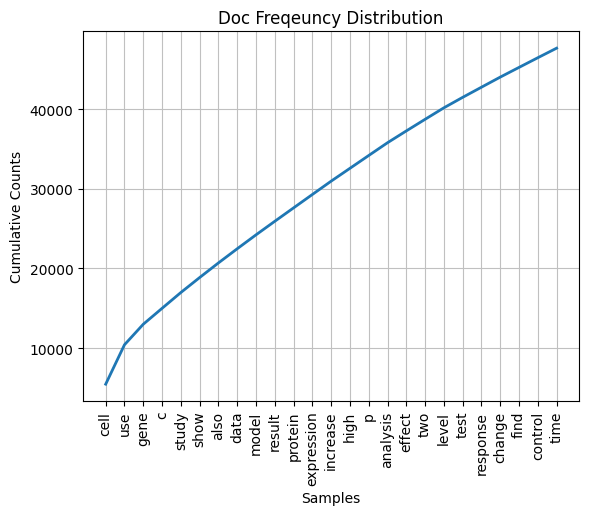

In [32]:
#checking custom stop lists and cleaning worked. Cut down 246k words
clean_doc_list = df_elife_clean.clean.tolist()
freqdist_maker(clean_doc_list)

In [33]:
df_elife_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        142 non-null    int64  
 1   article           142 non-null    object 
 2   summary           0 non-null      float64
 3   section_headings  142 non-null    object 
 4   keywords          142 non-null    object 
 5   year              0 non-null      float64
 6   title             0 non-null      float64
 7   clean             142 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.0+ KB


# Term Frequency - Inverse Document Frequency (TF-IDF) Implementation

To begin processing our data to create extractive summaries we implement a method of assigning vectors to words called Term Frequency - Inverse Document Frequency(tf-idf). This process allows us to assign a concept of importance and meaning to words in our documents represented by a number. This is done by first getting the term frequency, a count of each term in its document divided by the total number of terms in that document. Then the inverse document frequency, which is the total number of documents in our corpus divided by the number of documents containing some specific word, that value is then multiplied by log base e. We will do this for each document to produce a unique set of vector word pairs. The higher a vector, the more important that word is to that document. 

In [34]:
# Make the TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1,1))

# Get the clean column from the elife dataframe
elife_clean = df_elife_clean.clean.tolist()

# Calculate the TF-IDF score for unigrams and bigrams using the clean data
elife_t_c = vectorizer.fit_transform(elife_clean)

#print(elife_t_c)

In [35]:
len(elife_clean)

142

In [36]:
len(elife_clean)

142

In [37]:
#checking for data
vocab = list(vectorizer.vocabulary_.items())
print(vocab[:5])

[('nervous', 12450), ('system', 18580), ('combine', 3304), ('transmitter', 19348), ('mediate', 11198)]


# Extractive Summary Creation

Once we have all of our vectors its time to start assembling our summaries. Summaries are computed by assigning every word in our data a vector and then summing those vectors up for each sentence so that each sentence in a document recieves a score. Sentences with higher scores or deemed more informative and therefore more important to the article.

In [38]:
def sentence_value_creator_2(doc_sents: list, vect_obj, doc_index) -> list: # List of sentences in a document -> list of tuples (index, sum)
    """ 
    A function to take in a single article at a time, split the article by sentences, clean those sentences, split each sentence by words,
    match each word with its vector, sum the vectors and returns a list of tuples (sentence index, vector sums)
        """
    sent_index_val_dict = [] # Stores tuples (sentence_index, sum)

    for i, sent in enumerate(doc_sents): # For every index and sentence in doc_sents

        clean_sent = data_cleaner(sent) # Clean the sentence
        c = 0.0 # The vector sum (starting at 0)
        sent_split = clean_sent.split() # Split sentence by words

        for word in sent_split: # For every word in the sentence
            if word in vectorizer.vocabulary_: # If the word is in the TF-IDF vocabulary
                vec_val = vect_obj[doc_index, vectorizer.vocabulary_[word]] # Get the vector score from TF_IDF vectorizer
                c += vec_val # Add the vector score to the total sentence score
        sent_index_val_dict.append((i,float(c))) # Append a tuple of (index, score) for the sentence 

    return sent_index_val_dict # Return the list of sentence (index, score) tuples

The following cell executes the main TF-IDF extractive summarization and saves the summaries as a new column in the df_elife_train_clean dataframe called 'tfidf_summary'. The summary_percent variable is an adjustable parameter that determines the length of the extractive summaries represented as a percentage of the original document's sentences. 

The overall process for one iteration of the for-loop (which loops through all the documents):
1) The document is sent to the method remove_between_parens to have citations and other information enclosed in parenthese removed.
2) The document is split into a list of sentences (doc_sents).
3) The extranctive summary length (number of sentences) is calculated by summary_percent*doc_length. 
4) Each sentence in the document is given a score as calculated by the sentence_value_creator_2 function. These scores are saved in a list consisting of tuples of (sentence_index, sentence_score). The sentence_index is the index of this sentence in the original doc_sents.
5) The list of tuples is sorted by score and then cropped to contain only the highest scoring top_num sentences. 
6) The list of tuples is then sorted by index so that the final summary can consist of sentences in their original order.
5) Finally, the sentences represented by the top-scoring indices are concatenated into a string, in order, and that string is added to a list of summaries as the summary for the current document.

After the loop, the list of extractive TF-IDF summaries is added as a new column in the elife training dataframe called 'tfidf_summary'. 

Once every sentence in every article has been given a score we rank them from highest to lowest, take the top 60% of sentences in proportion the original number of sentences in the article and sort them based on order of appearence in accordance to their scores.

In [39]:
summary_percent = 0.4 # Percentage of total document sentences to save as the summary
doc_summaries = [] # List to store the document summaries
doc_list = df_elife_clean.article.tolist() # List of all the docs in elife train

df_elife_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        142 non-null    int64  
 1   article           142 non-null    object 
 2   summary           0 non-null      float64
 3   section_headings  142 non-null    object 
 4   keywords          142 non-null    object 
 5   year              0 non-null      float64
 6   title             0 non-null      float64
 7   clean             142 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.0+ KB


In [40]:

len(doc_list)

142

In [41]:

for doc_index, doc in enumerate(doc_list): # For every document
    no_parens = remove_between_parens(doc) # Remove citations and other parentheses from the document
    doc_sents = nltk.sent_tokenize(no_parens) # Split the document into sentences
    doc_length = len(doc_sents) # Get the total number of sentences in the document
    top_num = int(summary_percent * doc_length) # Calculate the number of sentences to keep for the summary
    sent_scores = sentence_value_creator_2(doc_sents, elife_t_c, doc_index) # Get list of (index, score) pairs for all the document sentences
    sorted_scores = sorted(sent_scores, key=lambda x: x[1]) # Sort based on second tuple object; sort by score
    sorted_scores = sorted_scores[-top_num:] # Crop to just the top top_num sents
    sorted_sents = sorted(sorted_scores, key = lambda x: x[0]) # Sort the top sents by index so they are in the logical order
    doc_summary = "" # Save summary of the document as string
    for (index, score) in sorted_sents: # For every (index, score) pair
        sent = doc_sents[index] # Get the original sentence using the index
        doc_summary = doc_summary + sent + " " # Add the original sent to the full summary 
    doc_summaries.append(doc_summary) # Add the summary to the list of all summaries

# Save the summaries as a new column in the elife train dataframe
df_elife_clean['tfidf_summary'] = doc_summaries
    

In [42]:

len(doc_summaries)

142

In [43]:
# save the summaries to a csv file
df_elife_clean.to_csv('data/elife_summaries.csv', index=True)

# save the tfidf_summary column to a text file
with open('data/elife_summaries.txt', 'w') as f:
    for summary in df_elife_clean['tfidf_summary']:
        f.write(summary + '\n')


In [44]:
top_10 = df_elife_clean.head(10)

In [45]:
df_elife_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        142 non-null    int64  
 1   article           142 non-null    object 
 2   summary           0 non-null      float64
 3   section_headings  142 non-null    object 
 4   keywords          142 non-null    object 
 5   year              0 non-null      float64
 6   title             0 non-null      float64
 7   clean             142 non-null    object 
 8   tfidf_summary     142 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 10.1+ KB


In [46]:
top_10

,Unnamed: 0,article,summary,section_headings,keywords,year,title,clean,tfidf_summary
0,0,Most nervous systems combine both transmitter-...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['neuroscience'],NaN,NaN,nervous system combine transmitter mediate dir...,Most nervous systems combine both transmitter-...
1,1,"The pre-Bötzinger complex ( preBötC ) , a key ...",NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['neuroscience'],NaN,NaN,pre b tzinger complex key primary generator in...,"The pre-Bötzinger complex , a key primary gen..."
2,2,Recent studies suggest that calcitonin gene-re...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['neuroscience'],NaN,NaN,recent study suggest calcitonin gene relate pe...,If CGRP neurons serve as a true general alarm ...
3,3,The relationship between obesity and human bra...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['neuroscience'],NaN,NaN,relationship obesity human brain structure inc...,"Using diffusion-weighted MRI from ∼30 , 000 UK..."
4,4,Cancer stem cells ( CSCs ) undergo epithelial-...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['cancer biology'],NaN,NaN,cancer stem cell undergo epithelial mesenchyma...,"However , tumour cells undergoing EMT have not..."
5,5,Apoptosis and clearance of apoptotic cells via...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['immunology and inflammation' 'cell biology'],NaN,NaN,apoptosis clearance apoptotic cell via efferoc...,"Here , we use single-cell RNA sequencing to pr..."
6,6,Advances in single-cell sequencing technologie...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['tools and resources' 'genetics and genomics'],NaN,NaN,advance single cell sequence technology provid...,"However , linking anatomical information to tr..."
7,7,"Understanding the origins of novel , complex p...",NaN,['Abstract' 'Introduction' 'Results and discus...,['ecology' 'evolutionary biology'],NaN,NaN,understand origin novel complex phenotype majo...,Poison frogs of the family Dendrobatidae have ...
8,8,Epithelial-to-mesenchymal transition ( EMT ) c...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['cancer biology'],NaN,NaN,epithelial mesenchymal transition contribute s...,"The complexity of EMT , involving redundant pr..."
9,9,Seedling root traits impact plant establishmen...,NaN,['Abstract' 'Introduction' 'Results' 'Discussi...,['plant biology'],NaN,NaN,seedling root trait impact plant establishment...,Seedling root traits impact plant establishmen...


In [47]:
tfidf_top_ten = top_10.tfidf_summary.tolist()
orig_sum_top_ten = top_10.summary.tolist()

In [ ]:
#tfidf_top_ten[0]

In [ ]:
#orig_sum_top_ten[0]

In [48]:
summary_list = df_elife_clean.tfidf_summary.tolist()

In [49]:
len(summary_list)

142

In [50]:
catch = 0
for i in summary_list:
    for j in i:
        if '\n' in j:
            #print(j)
            catch+=1
print(catch)

0


In [51]:
with open('elife_summaries.txt', 'w') as f:
    for summ in summary_list:
        f.write(summ.replace('\n','') + '\n')

In [52]:
with open('elife_summaries.txt', 'r') as g:
    lines = g.readlines()
len(lines)

142

In [53]:
df_elife_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        142 non-null    int64  
 1   article           142 non-null    object 
 2   summary           0 non-null      float64
 3   section_headings  142 non-null    object 
 4   keywords          142 non-null    object 
 5   year              0 non-null      float64
 6   title             0 non-null      float64
 7   clean             142 non-null    object 
 8   tfidf_summary     142 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 10.1+ KB


In [55]:
# save df_elife_test to a text file
with open('elife_test_reference.txt', 'w') as f:
    for article in df_elife_test.article:
        f.write(article + '\n')

In [ ]:
# take the first 100 lines of the df_elife_clean.tfidf_summary column and save to a text file
with open('elife_summaries100.txt', 'w') as f:
    for summary in df_elife_clean.tfidf_summary[:100]:
        f.write(summary + '\n')

In [ ]:
# take the first 100 lines of the 